In [2]:
from google.colab import drive 
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [3]:
%cd /gdrive/My Drive/Colab Notebooks/Udemy/DATA/

/gdrive/My Drive/Colab Notebooks/Udemy/DATA


In [4]:
# ls

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# reading data 
df = pd.read_csv('kc_house_data.csv')

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# No missing data
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


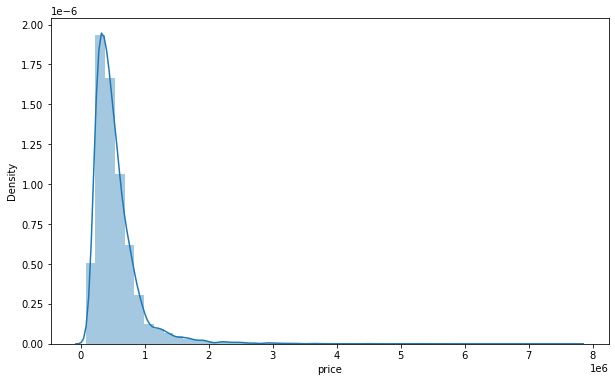

In [10]:
# data exploration
plt.figure(figsize=(10, 6))
sns.distplot(df['price'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


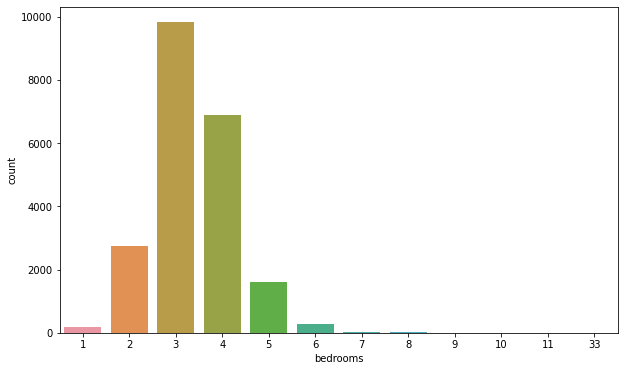

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(df['bedrooms'])

In [13]:
# correlation of price with different columns
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

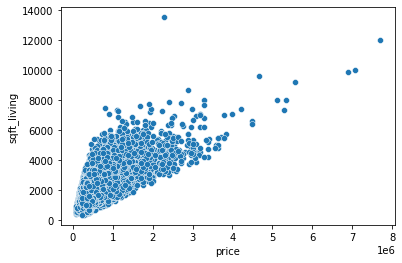

In [14]:
# plot between price and area
# we cannot see great relation
sns.scatterplot(x='price', y='sqft_living', data = df)

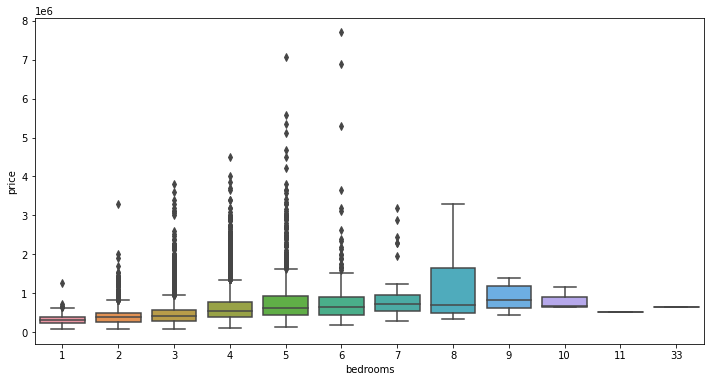

In [15]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data = df)

In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

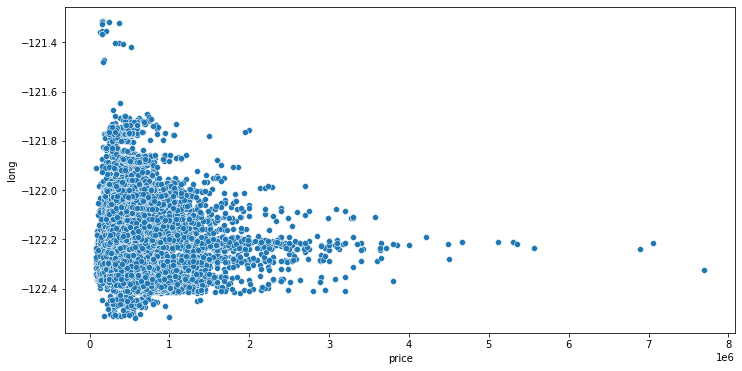

In [17]:
# relation bw latitude and longitude and price
# we cannot see major insights
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='long', data=df)

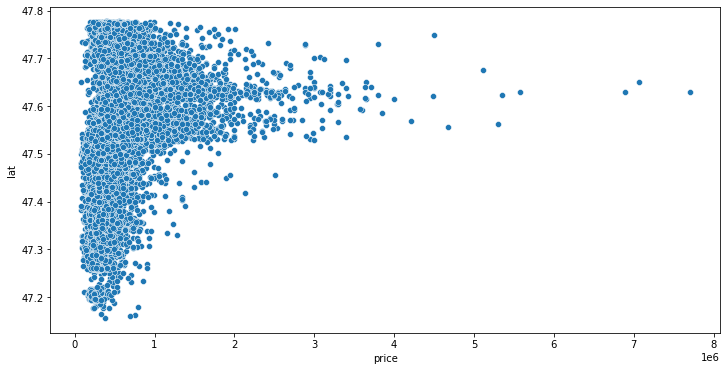

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='lat', data=df)

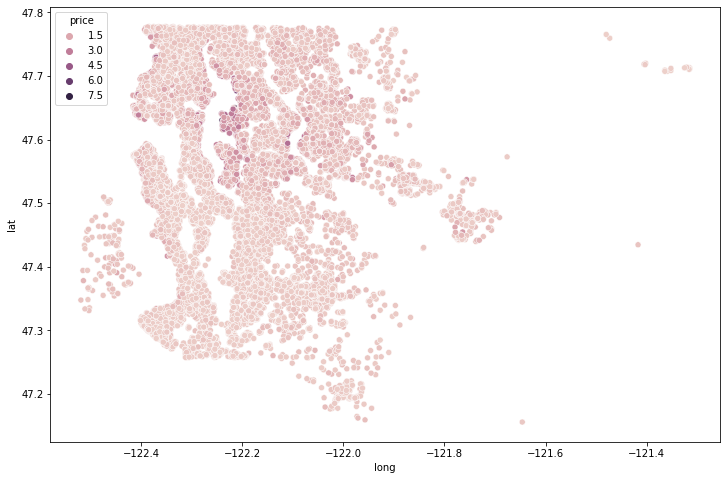

In [19]:
# we can see a map in below plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price')

In [21]:
# we cannot see better insights in above plot so
# removing outliers from our data
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [23]:
# len(df)*0.01

In [24]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]

In [25]:
# seeing data after removing 1% data which were outliers
non_top_1_perc.sort_values('price', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,3,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,3,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,4,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,4,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,4,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
15363,1568100920,4/8/2015,1950000.0,4,2.50,3440,14554,2.0,1,4,3,8,2170,1270,2012,0,98155,47.7364,-122.286,3170,11810
16238,3760500280,10/14/2014,1950000.0,3,2.50,2510,12779,1.5,0,4,3,10,2510,0,1968,0,98034,47.6982,-122.231,2810,12225
18860,4389201241,12/30/2014,1950000.0,4,4.00,4690,6900,2.0,0,0,3,11,3480,1210,2001,0,98004,47.6165,-122.216,2800,11240
14241,2425049107,3/5/2015,1950000.0,4,3.75,4150,17424,1.0,0,0,3,9,3130,1020,1963,2000,98039,47.6390,-122.236,3930,21420
556,5486800070,6/20/2014,1950000.0,7,3.50,4640,15235,2.0,0,1,3,11,2860,1780,1965,2003,98040,47.5666,-122.231,3230,20697


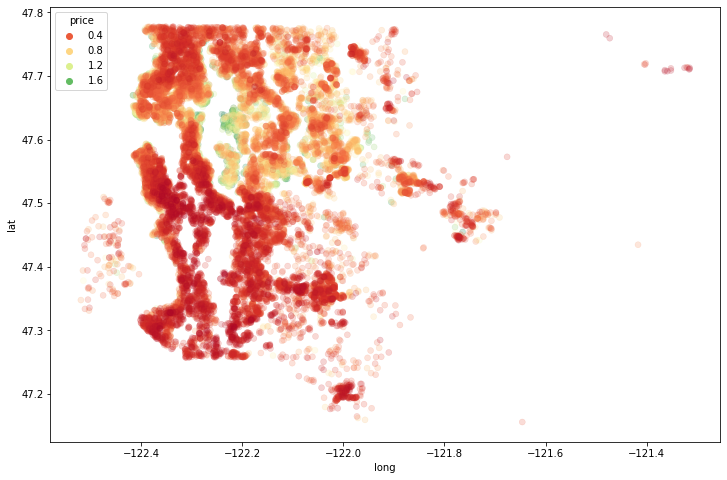

In [26]:
# now our plot will be more sensible
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, edgecolor=None, alpha=0.2, palette='RdYlGn', hue='price')

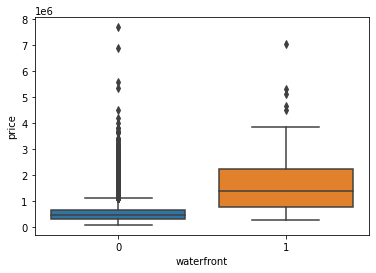

In [27]:
# we can see that area near shores are more costly

# now seeing this thing using boxplot
sns.boxplot(x='waterfront', y='price', data = df)

In [28]:
# thare will be no use of id, so droping this
df = df.drop('id', axis=1)

In [29]:
# we can also do some feature engg on out dataset

df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [30]:
df['date'] = pd.to_datetime(df['date'])

In [31]:
# df.head()

In [32]:
# feature engg on date column
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [33]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


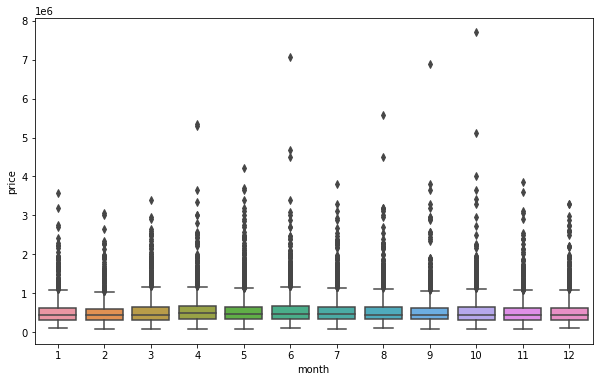

In [34]:
# exploration after feature engg

plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='price', data = df)

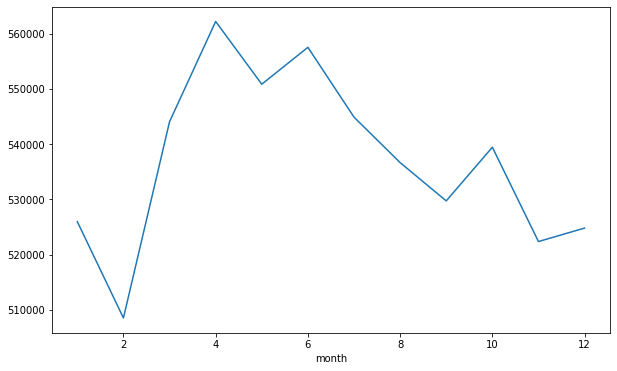

In [35]:
plt.figure(figsize=(10, 6))
df.groupby('month').mean()['price'].plot()

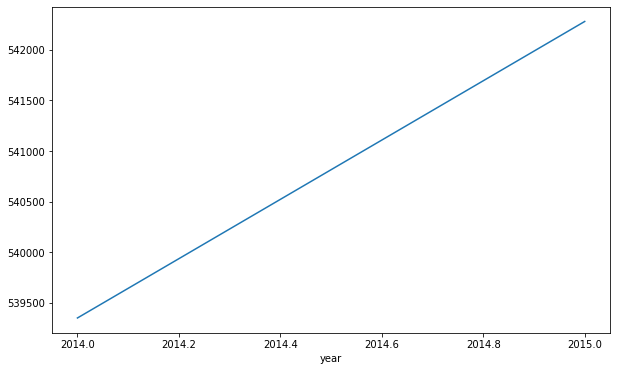

In [36]:
plt.figure(figsize=(10, 6))
df.groupby('year').mean()['price'].plot()

In [37]:
df = df.drop('date', axis=1)

In [ ]:
df.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [38]:
df['zipcode'].value_counts()   #too much so we can't make dummy

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [39]:
# droping zipcode
df = df.drop('zipcode', axis=1)

In [40]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [41]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [42]:
# now model building

from sklearn.model_selection import train_test_split

In [43]:
# spliting dataset in 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:
X_train = scaler.fit_transform(X_train)

In [46]:
X_test = scaler.transform(X_test)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [48]:
X_train.shape

(15117, 19)

In [49]:
# making deep learning model
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mse')

In [50]:
model.fit(x=X_train, y = y_train, validation_data = (X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 2s 7ms/step - loss: 438114541841.0667 - val_loss: 418931802112.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 420992857975.4667 - val_loss: 416066469888.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 416571316906.6667 - val_loss: 390211960832.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 377305688746.6667 - val_loss: 295836516352.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 264519380718.9333 - val_loss: 150598713344.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 147244252706.1333 - val_loss: 97076068352.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97859708723.2000 - val_loss: 94243971072.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 93923083673.6000 - val_loss: 92858605568.0000
Epoch 9/400
119/119 [

In [51]:
# seeing model history
losses = pd.DataFrame(model.history.history)

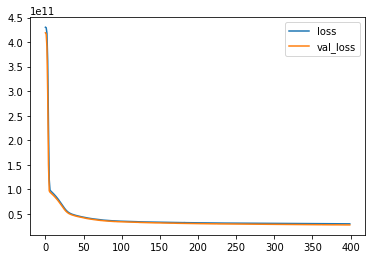

In [52]:
losses.plot()

In [53]:
# evaluation of our deep learning model
# using different metrices

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [54]:
predictions = model.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_test, predictions))

166116.01359546222

In [56]:
mean_absolute_error(y_test, predictions)

102127.76225284529

In [57]:
# model is good because eaxplained score is near to 1

explained_variance_score(y_test, predictions)

0.7919341430992272

In [58]:
# help(explained_variance_score)

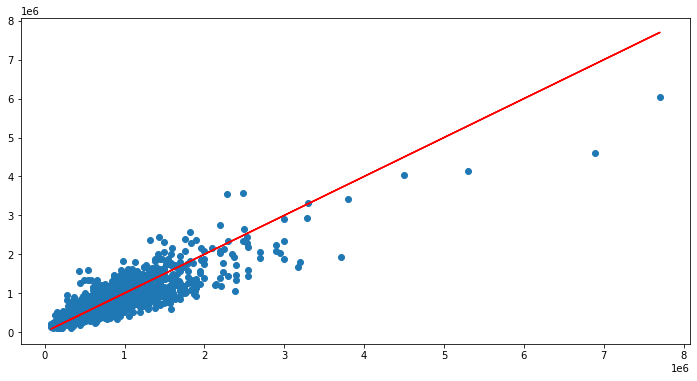

In [59]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

In [60]:
# taking one data for prediction
single_house = df.drop('price', axis=1).iloc[0]

In [61]:
single_house.values

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
        5.65000e+03,  2.01400e+03,  1.00000e+01])

In [62]:
single_house.values.reshape(-1, 19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [63]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [64]:
# prediction
model.predict(single_house)

array([[279172.16]], dtype=float32)

In [65]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


In [66]:
# we can see that predicted data and actual data is not very far
# this model may be improved